In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot  as plt

%matplotlib inline

2023-05-17 04:09:07.675154: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 04:09:07.900923: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-17 04:09:08.682709: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/rugewit/anaconda3/envs/tf2/lib/
2023-05-17 04:09:08.682808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plug

In [2]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

Загрузка датасета

In [3]:
#df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, 
#                     squeeze=True, date_parser=parser)
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0,date_parser=parser)

Описание

In [4]:
df.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [6]:
#df.Month = pd.to_datetime(df.Month)
#df = df.set_index("Month")
#df.head()

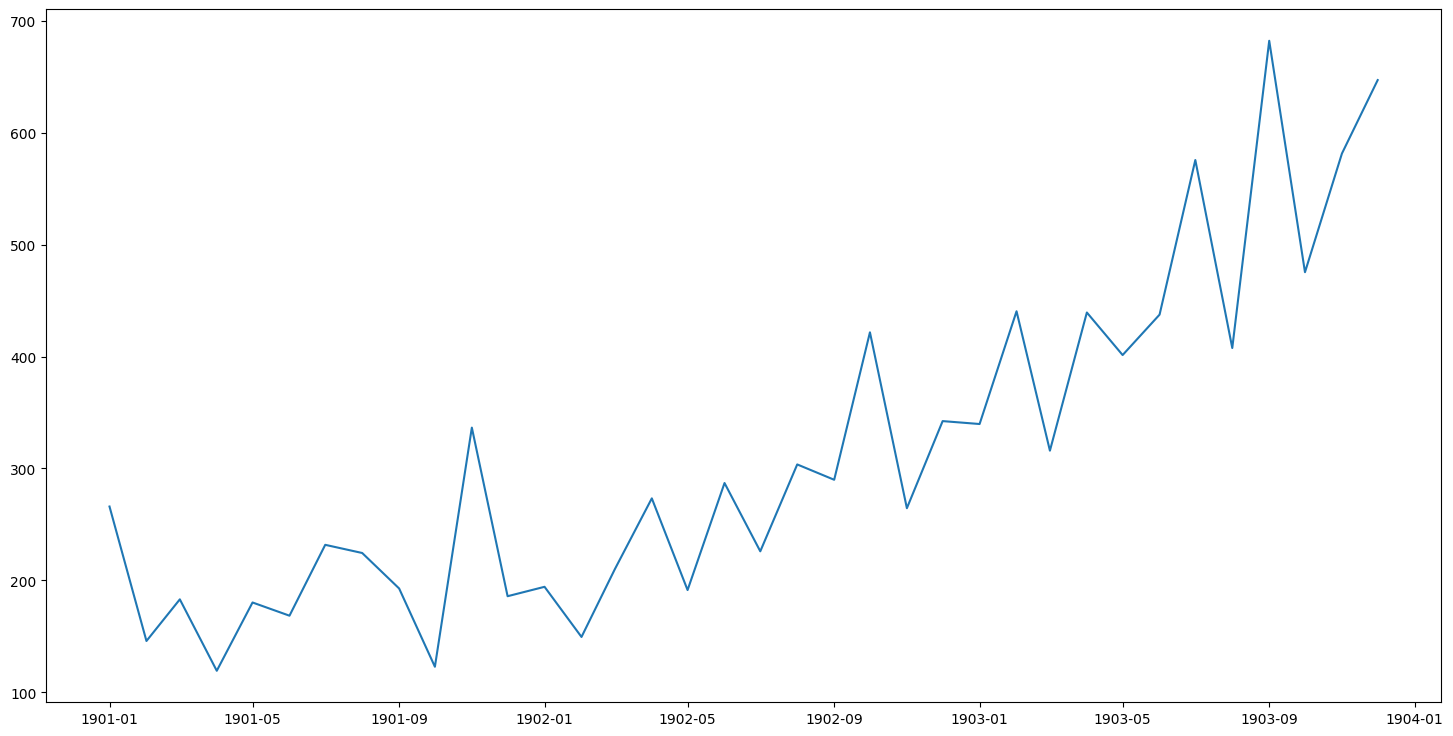

In [7]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Sales"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

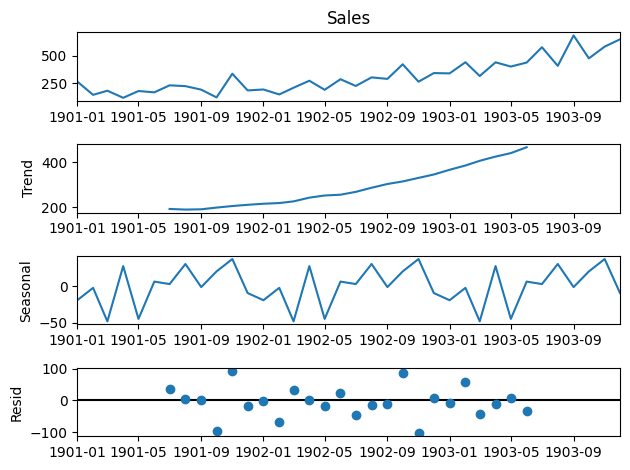

In [8]:
a = seasonal_decompose(df["Sales"], model = "add")
a.plot();

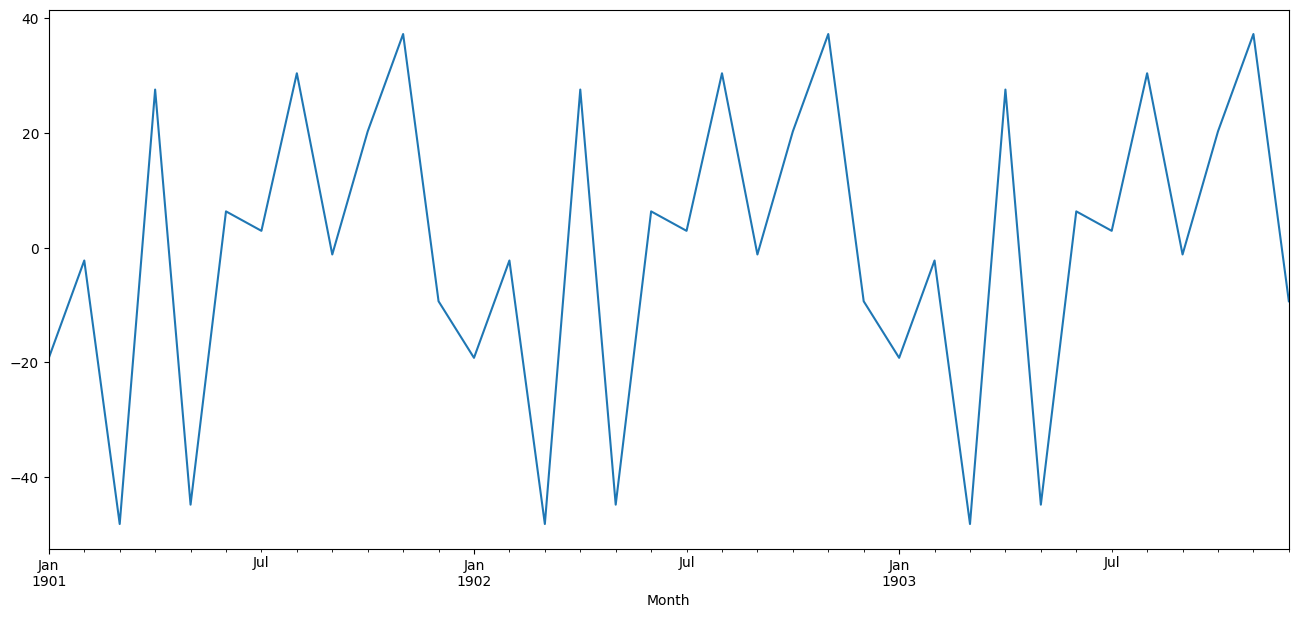

In [9]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

p-value

In [10]:
adf_test = adfuller(df["Sales"])
print('p-value = ' + str(adf_test[1]))

p-value = 1.0


ARIMA

In [11]:
train_data = df[:len(df)-6]
print(train_data)
test_data = df[len(df)-6:]

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3
1901-06-01  168.5
1901-07-01  231.8
1901-08-01  224.5
1901-09-01  192.8
1901-10-01  122.9
1901-11-01  336.5
1901-12-01  185.9
1902-01-01  194.3
1902-02-01  149.5
1902-03-01  210.1
1902-04-01  273.3
1902-05-01  191.4
1902-06-01  287.0
1902-07-01  226.0
1902-08-01  303.6
1902-09-01  289.9
1902-10-01  421.6
1902-11-01  264.5
1902-12-01  342.3
1903-01-01  339.7
1903-02-01  440.4
1903-03-01  315.9
1903-04-01  439.3
1903-05-01  401.3
1903-06-01  437.4


In [12]:
arima_model = SARIMAX(train_data['Sales'], order = (2,1,1), seasonal_order = (4,0,3,12))
#arima_model = ARIMA(train_data['Sales'], order=(5,1,0))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91039D+00    |proj g|=  1.41226D+00


 This problem is unconstrained.



At iterate    5    f=  5.33920D+00    |proj g|=  6.48542D-03

At iterate   10    f=  5.33833D+00    |proj g|=  1.51269D-03

At iterate   15    f=  5.33765D+00    |proj g|=  6.49271D-03

At iterate   20    f=  5.33448D+00    |proj g|=  6.84168D-03

At iterate   25    f=  5.33437D+00    |proj g|=  4.71041D-03

At iterate   30    f=  5.33419D+00    |proj g|=  2.53604D-03

At iterate   35    f=  5.33398D+00    |proj g|=  5.37599D-03

At iterate   40    f=  5.33389D+00    |proj g|=  2.79082D-03

At iterate   45    f=  5.33380D+00    |proj g|=  1.12351D-03

At iterate   50    f=  5.33375D+00    |proj g|=  1.50610D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                      Sales   No. Observations:                   30
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood                -160.013
Date:                                    Wed, 17 May 2023   AIC                            342.025
Time:                                            04:09:13   BIC                            357.066
Sample:                                        01-01-1901   HQIC                           346.736
                                             - 06-01-1903                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4029      2.259     -0.178      0.858      -4.830       4.025
ar.L2          0.1337      1.683      0.079      0.937      -3.165       3.432
ma.L1         -0.3747      2.285     -0.164      0.870      -4.853       4.104
ar.S.L12       0.0191    304.922   6.28e-05      1.000    -597.617     597.655
ar.S.L24       0.0182    515.697   3.53e-05      1.000   -1010.729    1010.765
ar.S.L36      -0.1451    223.941     -0.001      0.999    -439.061     438.771
ar.S.L48       0.8511    735.922      0.001      0.999   -1441.530    1443.232
ma.S.L12      -0.2065    353.997     -0.001      1.000    -694.027     693.614
ma.S.L24      -0.7613   6536.665     -0.000      1.000   -1.28e+04    1.28e+04
ma.S.L36       0.0898    896.031      0.000      1.000   -1756.100    1756.279
sigma2       451.5706     22.132     20.404      0.000     408.193     494.948
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.89   Prob(JB):                         0.87
Heteroskedasticity (H):               0.63   Skew:                             0.10
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.46e+20. Standard errors may be unstable.
"""

In [13]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1903-07-01    384.501106
1903-08-01    387.848104
1903-09-01    374.660080
1903-10-01    361.660038
1903-11-01    332.794638
1903-12-01    391.418825
Freq: MS, Name: ARIMA Predictions, dtype: float64

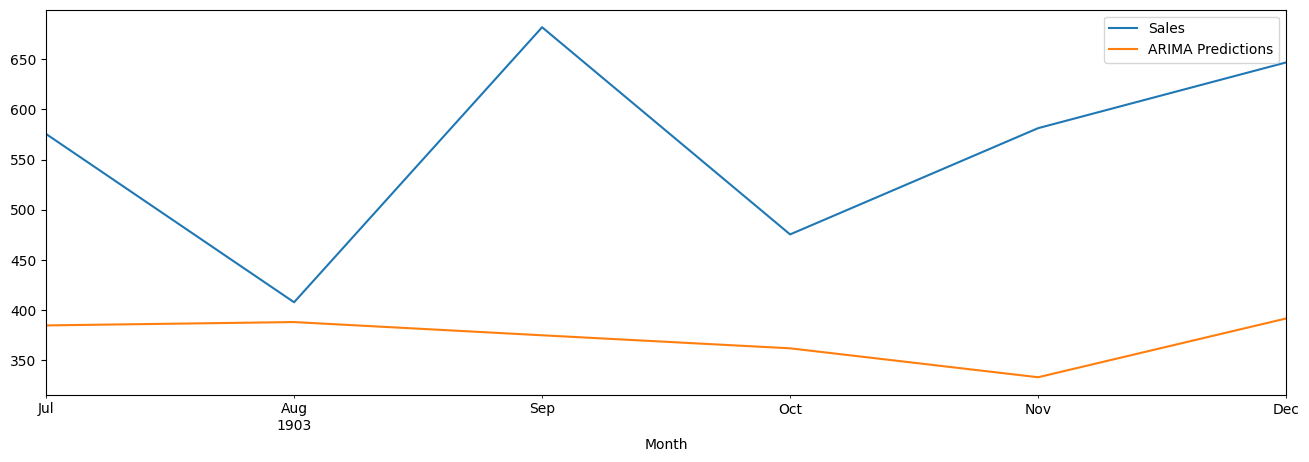

In [14]:
test_data['Sales'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [15]:
arima_rmse_error = rmse(test_data['Sales'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae_error = mean_absolute_error(test_data['Sales'], arima_pred)
mean_value = df['Sales'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 45211.354677058516
RMSE Error: 212.6296185319875
Mean: 312.59999999999997


In [16]:
global_test_data = test_data.copy()
global_test_data['ARIMA_Predictions'] = arima_pred

rnn

In [17]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [18]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [19]:
#rnn_model = Sequential()
#rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
#rnn_model.add(Dense(1))

rnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(n_input, n_features)),
    tf.keras.layers.LSTM(40),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

2023-05-17 04:09:14.390809: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 04:09:14.422399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 04:09:14.422628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 04:09:14.423306: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40)                6720      
                                                                 
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 8,401
Trainable params: 8,401
Non-trainable params: 0
_________________________________________________________________


In [20]:
rnn_model.fit_generator(generator, epochs=25)

Epoch 1/25


2023-05-17 04:09:16.817260: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


18/18 [==============================] - 2s 4ms/step - loss: 0.1643
Epoch 2/25
18/18 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 3/25
18/18 [==============================] - 0s 4ms/step - loss: 0.0370
Epoch 4/25
18/18 [==============================] - 0s 4ms/step - loss: 0.0351
Epoch 5/25
18/18 [==============================] - 0s 4ms/step - loss: 0.0360
Epoch 6/25
18/18 [==============================] - 0s 5ms/step - loss: 0.0379
Epoch 7/25
18/18 [==============================] - 0s 4ms/step - loss: 0.0390
Epoch 8/25
18/18 [==============================] - 0s 4ms/step - loss: 0.0341
Epoch 9/25
18/18 [==============================] - 0s 5ms/step - loss: 0.0358
Epoch 10/25
18/18 [==============================] - 0s 5ms/step - loss: 0.0311
Epoch 11/25
18/18 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 12/25
18/18 [==============================] - 0s 5ms/step - loss: 0.0370
Epoch 13/25
18/18 [==============================] - 0s 5ms/

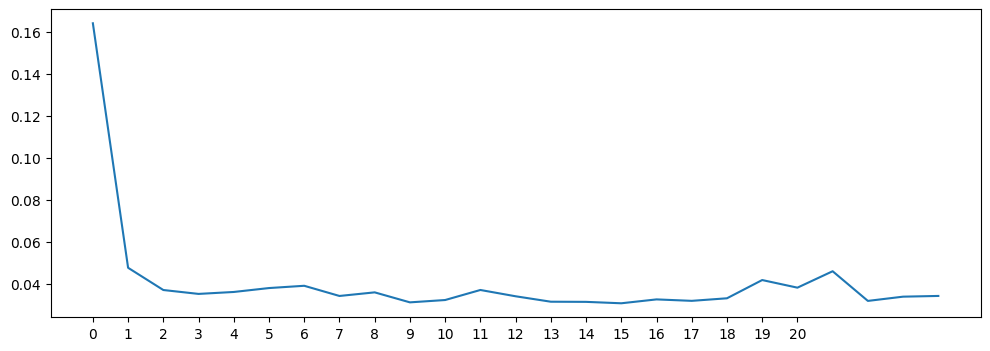

In [21]:
losses_rnn = rnn_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_rnn)),losses_rnn);

In [22]:
RNN_Predictions_scaled = list()

# last n_input elements
batch = scaled_train_data[-n_input:]
print('batch')
print(batch)
print('shape is ', batch.shape)
# shape now is (1, 12, 1)
current_batch = batch.reshape((1, n_input, n_features))
print('current batch')
print(current_batch)
print('shape is ', current_batch.shape)
for i in range(len(test_data)):   
    rnn_pred = rnn_model.predict(current_batch)[0]
    RNN_Predictions_scaled.append(rnn_pred) 
    # first element in current_batch will be gone
    # a new element will be inserted at the end
    current_batch = np.append(current_batch[:,1:,:],[[rnn_pred]],axis=1)
    print('current_batch now\n', current_batch)
    print('current_batch shape\n', current_batch.shape)

batch
[[0.33229524]
 [0.5739645 ]
 [0.53129866]
 [0.94145126]
 [0.45219558]
 [0.6944877 ]
 [0.68639053]
 [1.        ]
 [0.61227032]
 [0.99657428]
 [0.87823108]
 [0.99065712]]
shape is  (12, 1)
current batch
[[[0.33229524]
  [0.5739645 ]
  [0.53129866]
  [0.94145126]
  [0.45219558]
  [0.6944877 ]
  [0.68639053]
  [1.        ]
  [0.61227032]
  [0.99657428]
  [0.87823108]
  [0.99065712]]]
shape is  (1, 12, 1)
1/1 [==============================] - 0s 285ms/step
current_batch now
 [[[0.5739645 ]
  [0.53129866]
  [0.94145126]
  [0.45219558]
  [0.6944877 ]
  [0.68639053]
  [1.        ]
  [0.61227032]
  [0.99657428]
  [0.87823108]
  [0.99065712]
  [1.02054644]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 17ms/step
current_batch now
 [[[0.53129866]
  [0.94145126]
  [0.45219558]
  [0.6944877 ]
  [0.68639053]
  [1.        ]
  [0.61227032]
  [0.99657428]
  [0.87823108]
  [0.99065712]
  [1.02054644]
  [1.07658923]]]
current_batch shape
 (1, 12, 1)
1/1 [==============

In [23]:
RNN_Predictions_scaled

[array([1.0205464], dtype=float32),
 array([1.0765892], dtype=float32),
 array([1.1263114], dtype=float32),
 array([1.1784681], dtype=float32),
 array([1.2213053], dtype=float32),
 array([1.2776523], dtype=float32)]

In [24]:
RNN_Predictions = scaler.inverse_transform(RNN_Predictions_scaled)

In [25]:
global_test_data['RNN_Predictions'] = RNN_Predictions

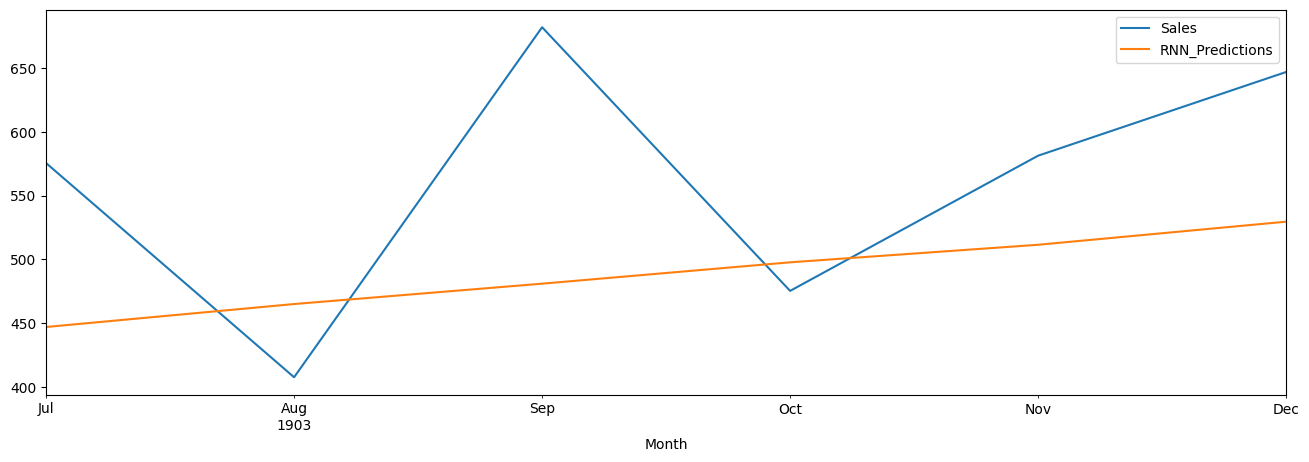

In [26]:
global_test_data['Sales'].plot(figsize = (16,5), legend=True)
global_test_data['RNN_Predictions'].plot(legend = True);

In [27]:
rnn_rmse_error = rmse(global_test_data['Sales'], global_test_data["RNN_Predictions"])
rnn_mse_error = rnn_rmse_error**2
rnn_mae_error = mean_absolute_error(global_test_data['Sales'], global_test_data["RNN_Predictions"])
mean_value = df['Sales'].mean()

print(f'MSE Error: {rnn_mse_error}\nRMSE Error: {rnn_rmse_error}\nMean: {mean_value}')

MSE Error: 13229.005933710514
RMSE Error: 115.01741578435204
Mean: 312.59999999999997


In [28]:
rmse_errors = [arima_rmse_error, rnn_rmse_error]
mse_errors = [arima_mse_error, rnn_mse_error]
mae_errors = [arima_mae_error, rnn_mae_error]

In [33]:
errors = pd.DataFrame({"Models" : ["ARIMA", "RNN"],"RMSE Error" : rmse_errors, "MSE Error" : mse_errors,"MAE Error": mae_errors})

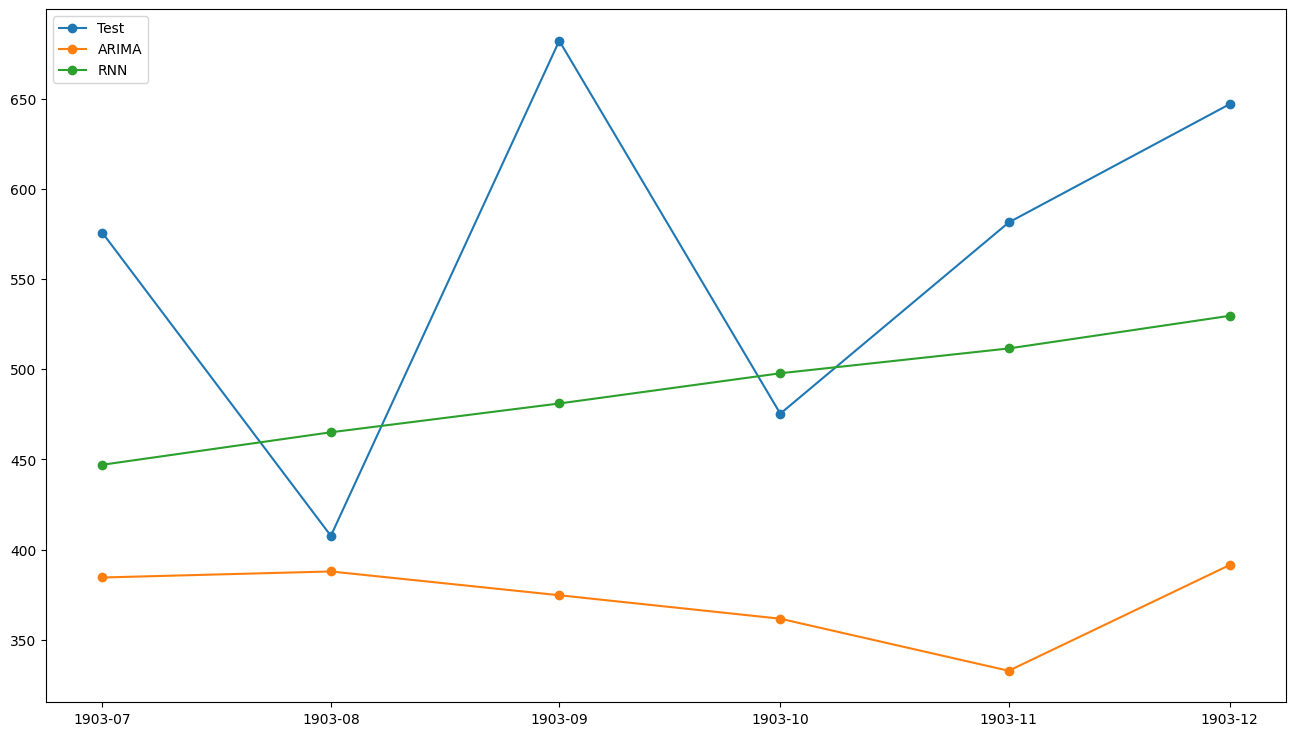

In [30]:
plt.figure(figsize=(16,9))
plt.plot_date(global_test_data.index, global_test_data["Sales"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["ARIMA_Predictions"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["RNN_Predictions"], linestyle="-")
plt.legend(["Test", "ARIMA", 'RNN'], loc ="upper left")
plt.show()

In [34]:
print(f"Mean: {global_test_data['Sales'].mean()}")
errors

Mean: 561.4333333333333


,Models,RMSE Error,MSE Error,MAE Error
0,ARIMA,212.629619,45211.354677,189.286201
1,RNN,115.017416,13229.005934,99.421266


In [32]:
global_test_data

,Sales,ARIMA_Predictions,RNN_Predictions
Month,,,
1903-07-01,575.5,384.501106,446.997461
1903-08-01,407.6,387.848104,464.992801
1903-09-01,682.0,374.660080,480.958597
1903-10-01,475.3,361.660038,497.706110
1903-11-01,581.3,332.794638,511.461116
1903-12-01,646.9,391.418825,529.554142
